In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import transforms
from torch import optim

## Loading Data

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

0it [00:00, ?it/s]

  7%|▋         | 12517376/170498071 [00:20<03:35, 733202.49it/s] 

KeyboardInterrupt: 

In [ ]:
classes = trainset.classes
print(classes)

In [ ]:
trainLoader = torch.utils.data.DataLoader(trainset,batch_size=8,shuffle=True)
dataLoader = iter(trainLoader)

In [ ]:
images,labels = dataLoader.next()
print(images.shape)
print(images[0].shape)
print(labels[0].item())

In [0]:
print(type(images[0]))

<class 'torch.Tensor'>


## **Visualisation**

In [0]:
def showImg(img):
    plt.imshow(np.transpose(img.numpy(),(1,2,0)))
    plt.show()

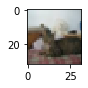

In [0]:
plt.figure(figsize=(1,1))
showImg(images[0])

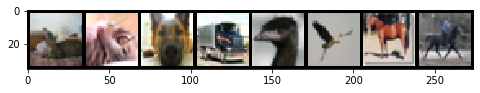

cat cat dog truck bird bird horse horse


In [0]:
plt.figure(figsize=(8,8))
showImg(torchvision.utils.make_grid(images))
print(' '.join(classes[label] for label in labels))

## **Single Convolutional Layer**

In [3]:
import torch.nn as nn
#nn.Conv2d?

  7%|▋         | 12632064/170498071 [00:40<03:35, 733202.49it/s]

In [0]:
class FirstConvNetwork(nn.Module):
    def __init__(self):
        super(FirstConvNetwork,self).__init__()
        self.conv = nn.Conv2d(3,16,3,stride=1,padding=0)

    def forward(self,x):
        n = self.conv(x)
        return n

In [0]:
net = FirstConvNetwork()
out = net(images)
print(out.shape)

torch.Size([8, 16, 30, 30])


(30, 30)


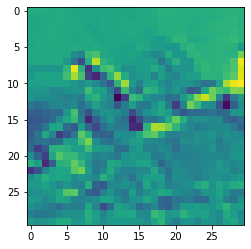

In [0]:
f = out[0,0,:,:].detach().numpy()
print(f.shape)
plt.imshow(f)

# Deep CNNs

In [4]:
class FirstConvNetwork(nn.Module):
    def __init__(self):
        super(FirstConvNetwork,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3,8,3,padding=1),
            nn.MaxPool2d(2,stride=2 ),
            nn.Conv2d(8,16,3,padding=1),
            nn.MaxPool2d(2,stride=2),
        )

    def forward(self,x):
        n = self.conv(x)
        return n  

In [0]:
net = FirstConvNetwork()
out = net(images)
print(out.shape)

torch.Size([8, 16, 8, 8])


(8, 8)


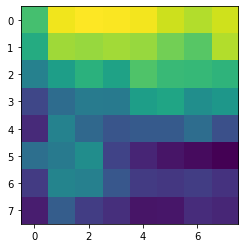

In [0]:
f = out[0,0,:,:].detach().numpy()
print(f.shape)
plt.imshow(f)

# **LeNet**

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2),
            nn.Conv2d(6,16,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2),
            nn.Flatten(),
            nn.Linear(400,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )

    def forward(self,x):
        n = self.conv(x)
        return n  

In [0]:
BATCH_SIZE=128
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainLoader = torch.utils.data.DataLoader(trainset,batch_size=BATCH_SIZE,shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,transform=transforms.ToTensor())
testLoader = torch.utils.data.DataLoader(testset,batch_size=BATCH_SIZE,shuffle=False)
print(trainset)
print(testset)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
def evaluate(dataLoader,model):
    count=0
    true_val=0
    for images,labels in dataLoader:
        images=images.to(device)
        labels = labels.to(device)
        pred_labels = model(images)
        _,pred = torch.max(pred_labels,1)
        count+=labels.shape[0]
        true_val+= (labels==pred).sum().item()
    return 100*true_val/count   

In [0]:
def fit(trainLoader,model,opt,loss_fn,epochs):
    loss_arr=[]
    loss_epoch_arr=[]
    for i in range(epochs):

        for images,labels in trainLoader:
            images=images.to(device)
            labels = labels.to(device)      
            loss = loss_fn(model(images),labels)
            loss_arr.append(loss.item())
            loss.backward()

            opt.step()
            opt.zero_grad()
        loss_epoch_arr.append(loss_arr[-1])
        print("Epoch #{} - Train Accuracy : {} , Test Accuracy : {}".format(i,evaluate(trainLoader,model),evaluate(testLoader,model)))

    plt.plot(loss_epoch_arr)

Exception reporting mode: Verbose
Epoch #0 - Train Accuracy : 38.164 , Test Accuracy : 38.22
Epoch #1 - Train Accuracy : 43.492 , Test Accuracy : 43.06
Epoch #2 - Train Accuracy : 47.03 , Test Accuracy : 46.56
Epoch #3 - Train Accuracy : 50.038 , Test Accuracy : 49.01
Epoch #4 - Train Accuracy : 51.334 , Test Accuracy : 50.05
Epoch #5 - Train Accuracy : 53.814 , Test Accuracy : 51.77
Epoch #6 - Train Accuracy : 55.406 , Test Accuracy : 52.38
Epoch #7 - Train Accuracy : 56.674 , Test Accuracy : 53.08
Epoch #8 - Train Accuracy : 58.636 , Test Accuracy : 54.08
Epoch #9 - Train Accuracy : 59.736 , Test Accuracy : 54.62


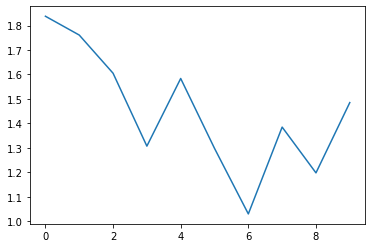

In [0]:
%xmode verbose
model=LeNet().to(device)
opt = optim.Adam(model.parameters(),weight_decay=1e-5)
loss_fn = nn.CrossEntropyLoss()
fit(trainLoader,model,opt,loss_fn,epochs=10)